The image dataset is not attached with the notebook because of size. 
Dataset Link: https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge

Image dataset was converted to jpg using Python's Pydicom because R's oro.Dicom library does not support this type of Dicom images. 
JPG image dataset can also be found in this link: https://www.kaggle.com/datasets/sovitrath/rsna-pneumonia-detection-2018



In [1]:
library(ggplot2)
library(dplyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
install.packages("jpeg")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
# Load the jpeg package
library(jpeg)

# Load the Data

In [4]:

det_class_path <- 'rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv'
bbox_path <- 'rsna-pneumonia-detection-challenge/stage_2_train_labels.csv'
dicom_dir <- 'rsna-pneumonia-detection-challenge/stage_2_train_images/'
jpg_dir <- 'rsna-pneumonia-detection-challenge/images/'



In [5]:
train_df <- read.csv(bbox_path)
head(train_df)

,patientId,x,y,width,height,Target
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NA,NA,NA,NA,0
2,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NA,NA,NA,NA,0
3,00322d4d-1c29-4943-afc9-b6754be640eb,NA,NA,NA,NA,0
4,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NA,NA,NA,NA,0
5,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1
6,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1


## Plot the Class Distribution

30227 class infos loaded
 patient cases
                                 patientId                        class
13057 83d25ba1-ba1c-4d32-b505-5cf0cffeff4c                 Lung Opacity
28603 fcf9aa51-4ba1-438b-bfb5-f226d8ff00f9 No Lung Opacity / Not Normal
10466 6f439221-5c8e-4b75-a443-0cccc10a6bb2 No Lung Opacity / Not Normal


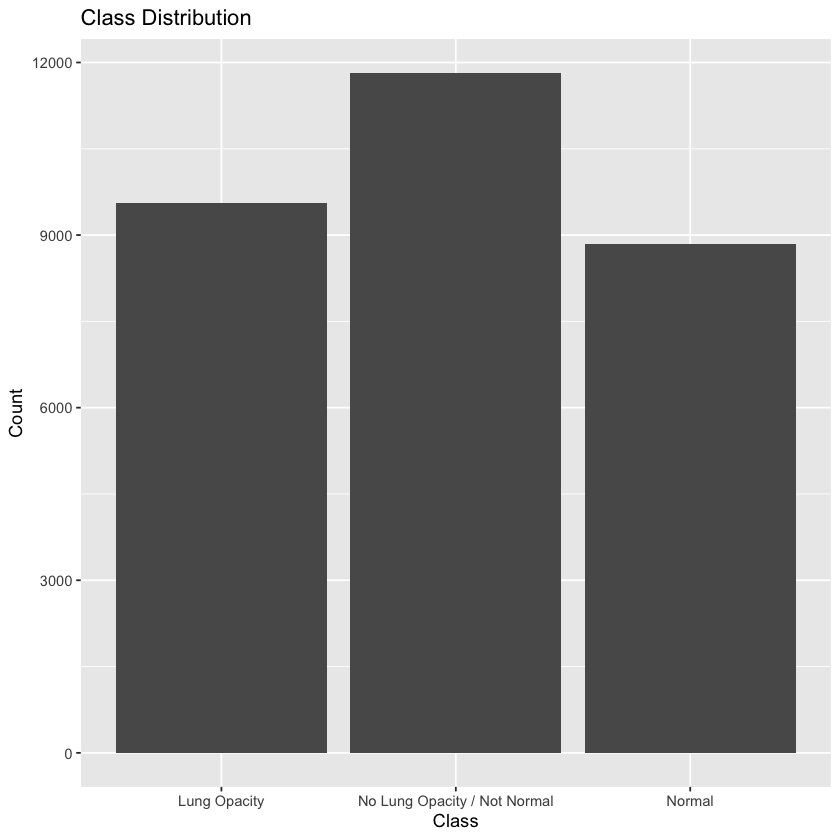

In [6]:
# Read detailed class info
det_class_df <- read.csv(det_class_path)
cat(nrow(det_class_df), 'class infos loaded\n')
cat(nrow(unique(det_class_df$patientId)), 'patient cases\n')

# Plot bar chart
det_class_df %>%
  group_by(class) %>%
  summarize(count = n()) %>%
  ggplot(aes(x = class, y = count)) +
  geom_bar(stat = 'identity') +
  labs(title = 'Class Distribution',
       x = 'Class',
       y = 'Count')

# Display a sample of 3 rows
print(det_class_df[sample(nrow(det_class_df), 3), ])

In [9]:


# Read bounding box info
bbox_df <- read.csv(bbox_path)

# Inner join on patientId
comb_bbox_df <- inner_join(bbox_df, det_class_df, by = "patientId")


# cat(nrow(bbox_df), 'boxes loaded\n')
# cat(nrow(unique(bbox_df$patientId)), 'patient cases\n')

# Display a sample of 3 rows
# print(bbox_df[sample(nrow(bbox_df), 3), ])


# Group by patientId and count the number of boxes
box_df <- comb_bbox_df %>%
  group_by(patientId) %>%
  summarize(boxes = n())

# Merge the box_df with comb_bbox_df on patientId
comb_box_df <- inner_join(comb_bbox_df, box_df, by = "patientId")

# Count the number of patients for each number of boxes
result_df <- box_df %>%
  group_by(boxes) %>%
  summarize(patients = n())

print(result_df)


# Group by class and Target, count the occurrences, and reset index
result_df_by_target <- comb_bbox_df %>%
  group_by(class, Target) %>%
  summarize(`Patient Count` = n()) %>%
  as.data.frame()

print(result_df_by_target)


Warning message in inner_join(bbox_df, det_class_df, by = "patientId"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 5 of `x` matches multiple rows in `y`.
ℹ Row 5 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


# A tibble: 4 × 2
  boxes patients
  <int>    <int>
1     1    23286
2     4     3266
3     9      119
4    16       13


`summarise()` has grouped output by 'class'. You can override using the
`.groups` argument.


                         class Target Patient Count
1                 Lung Opacity      1         16957
2 No Lung Opacity / Not Normal      0         11821
3                       Normal      0          8851


In [10]:

# Create image_df with path and patientId
image_df <- data.frame(path = list.files(jpg_dir, pattern = "\\jpg$", full.names = TRUE))
image_df$patientId <- tools::file_path_sans_ext(basename(image_df$path))

cat(nrow(image_df), 'images found\n')

# Extract patientIds from image_df and comb_box_df
# img_pat_ids <- unique(image_df$patientId)
# box_pat_ids <- unique(comb_box_df$patientId)

# Left join comb_box_df with image_df on patientId
image_bbox_df <- left_join(comb_box_df, image_df, by = "patientId") %>%
  arrange(patientId)

cat(nrow(image_bbox_df), 'image bounding boxes\n')
head(image_bbox_df, 5)


26684 images found
37629 image bounding boxes


,patientId,x,y,width,height,Target,class,boxes,path
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>
1,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NA,NA,NA,NA,0,No Lung Opacity / Not Normal,1,rsna-pneumonia-detection-challenge/images//0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg
2,000924cf-0f8d-42bd-9158-1af53881a557,NA,NA,NA,NA,0,Normal,1,rsna-pneumonia-detection-challenge/images//000924cf-0f8d-42bd-9158-1af53881a557.jpg
3,000db696-cf54-4385-b10b-6b16fbb3f985,316,318,170,478,1,Lung Opacity,4,rsna-pneumonia-detection-challenge/images//000db696-cf54-4385-b10b-6b16fbb3f985.jpg
4,000db696-cf54-4385-b10b-6b16fbb3f985,316,318,170,478,1,Lung Opacity,4,rsna-pneumonia-detection-challenge/images//000db696-cf54-4385-b10b-6b16fbb3f985.jpg
5,000db696-cf54-4385-b10b-6b16fbb3f985,660,375,146,402,1,Lung Opacity,4,rsna-pneumonia-detection-challenge/images//000db696-cf54-4385-b10b-6b16fbb3f985.jpg


## Scatter Plot of Positive Bounding Boxes

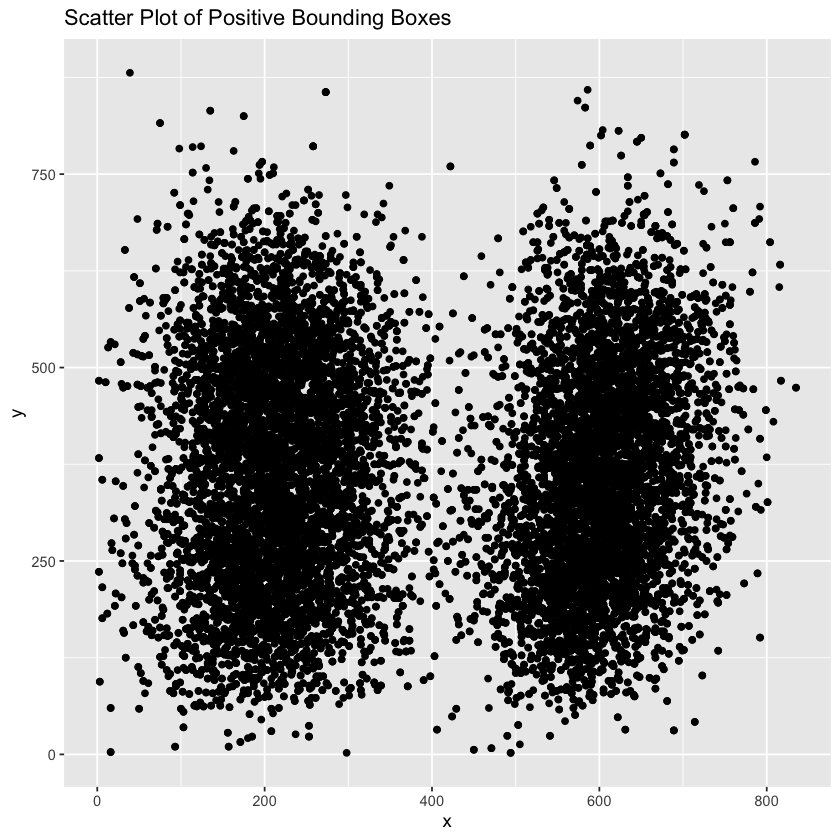

In [12]:


# Filter rows where Target is 1
pos_bbox <- subset(image_bbox_df, Target == 1)

# Scatter plot
ggplot(pos_bbox, aes(x = x, y = y)) +
  geom_point() +
  labs(x = "x", y = "y") +
  ggtitle("Scatter Plot of Positive Bounding Boxes")

## Distribution of Target Variable

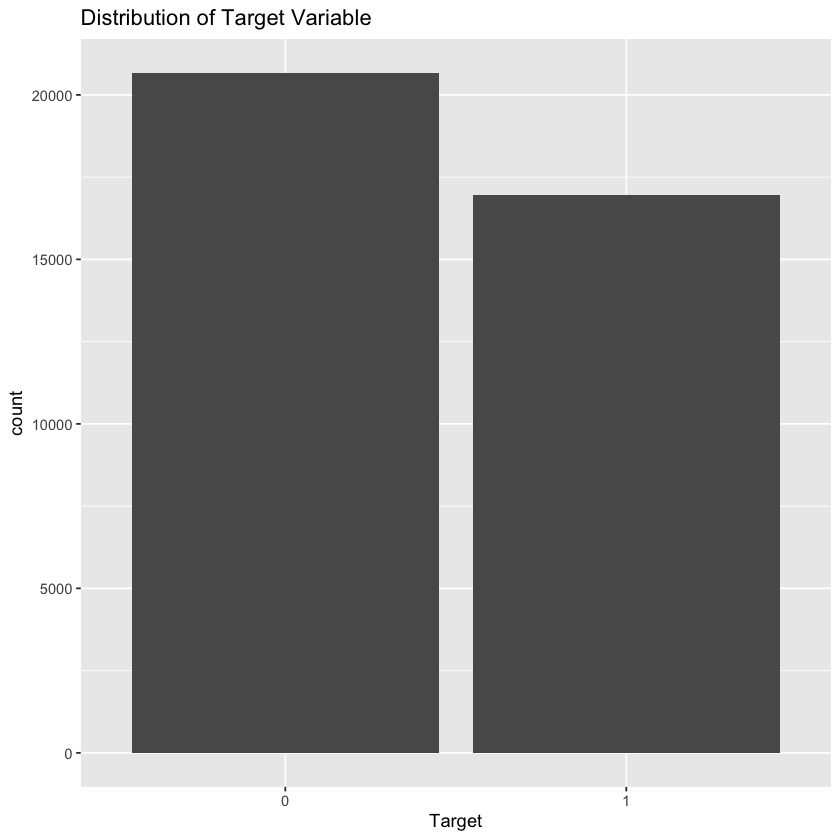

In [13]:

# Plot the distribution of 'Target' variable
ggplot(image_bbox_df, aes(x = factor(Target))) +
  geom_bar() +
  labs(title = "Distribution of Target Variable", x = "Target")







## Histogram of Number of Boxes per Patient

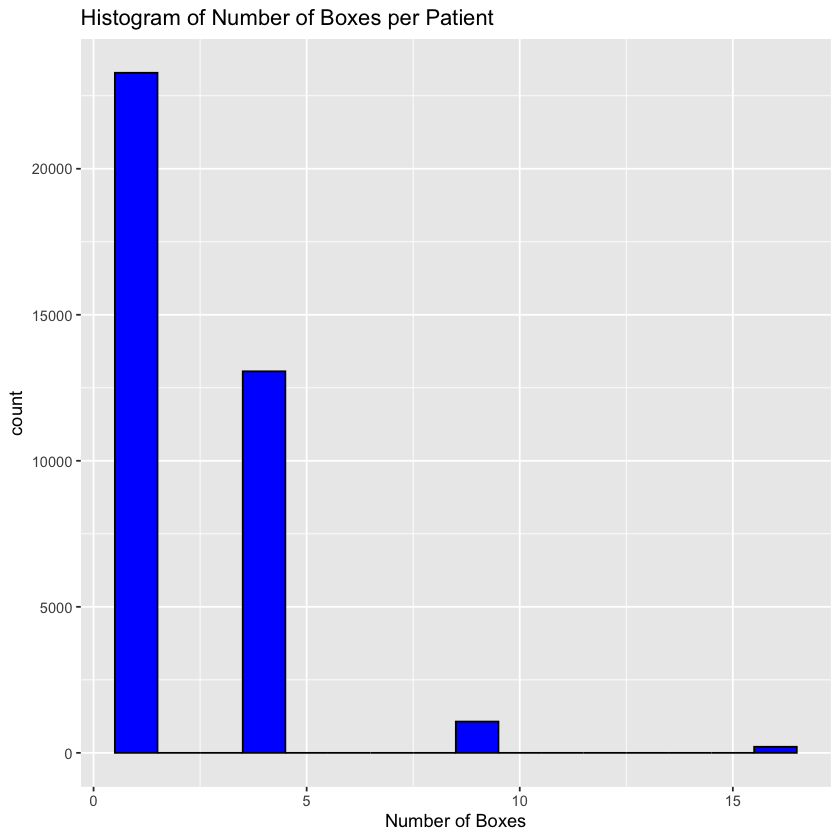

In [224]:
# Plot a histogram of the number of boxes per patient
ggplot(image_bbox_df, aes(x = boxes)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Histogram of Number of Boxes per Patient", x = "Number of Boxes")




## Scatter Plot of 'x' and 'y'

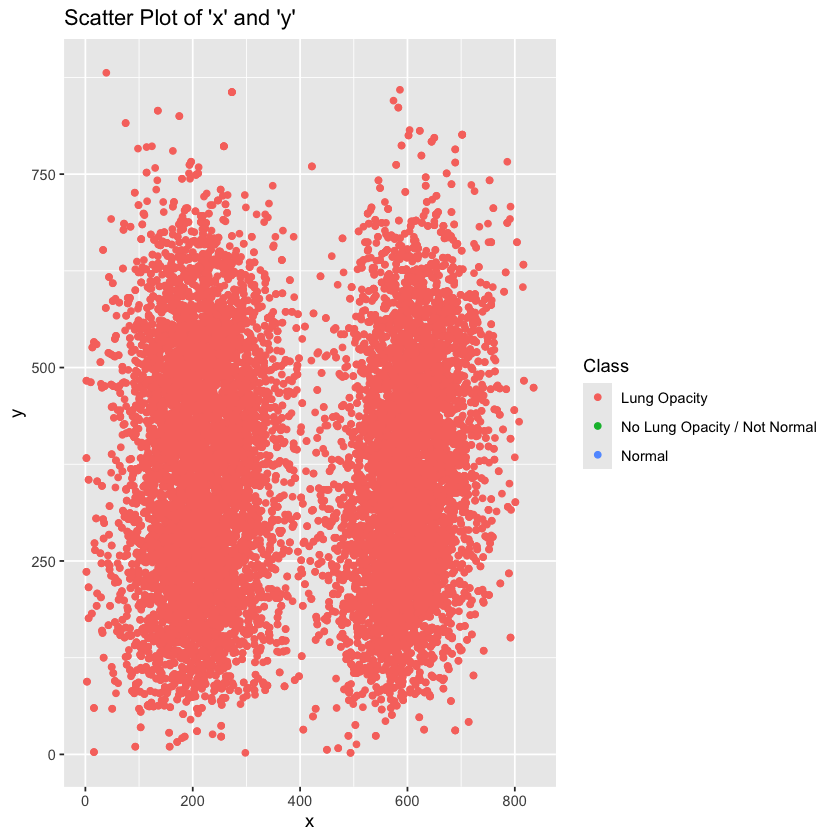

In [225]:
# Scatter plot of 'x' and 'y' with different colors for each class
ggplot(image_bbox_df, aes(x = x, y = y, color = class)) +
  geom_point() +
  labs(title = "Scatter Plot of 'x' and 'y'", x = "x", y = "y", color = "Class")



## Display Images

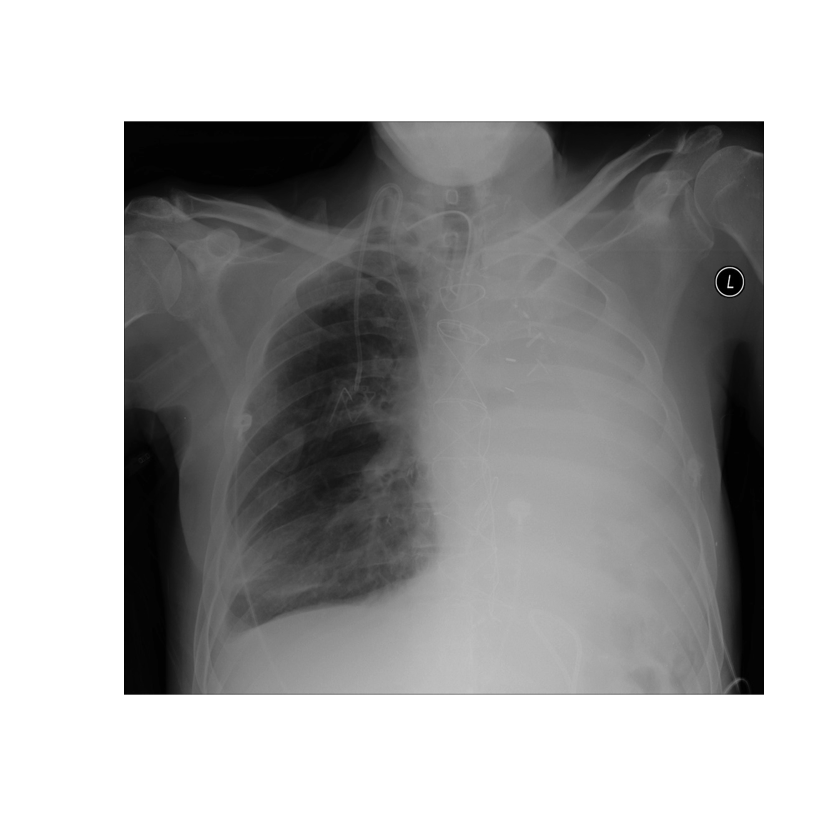

In [14]:


# Specify the file path to your JPEG file
file_path <- "./rsna-pneumonia-detection-challenge/images/06bf9151-5732-4968-b198-f4109676cd55.jpg"

# Read the JPEG file
image <- readJPEG(file_path)

# Display the image
plot(0:1, 0:1, type = 'n', axes = FALSE, xlab = '', ylab = '')
rasterImage(image, 0, 0, 1, 1)


## Overlay Bounding boxes on images

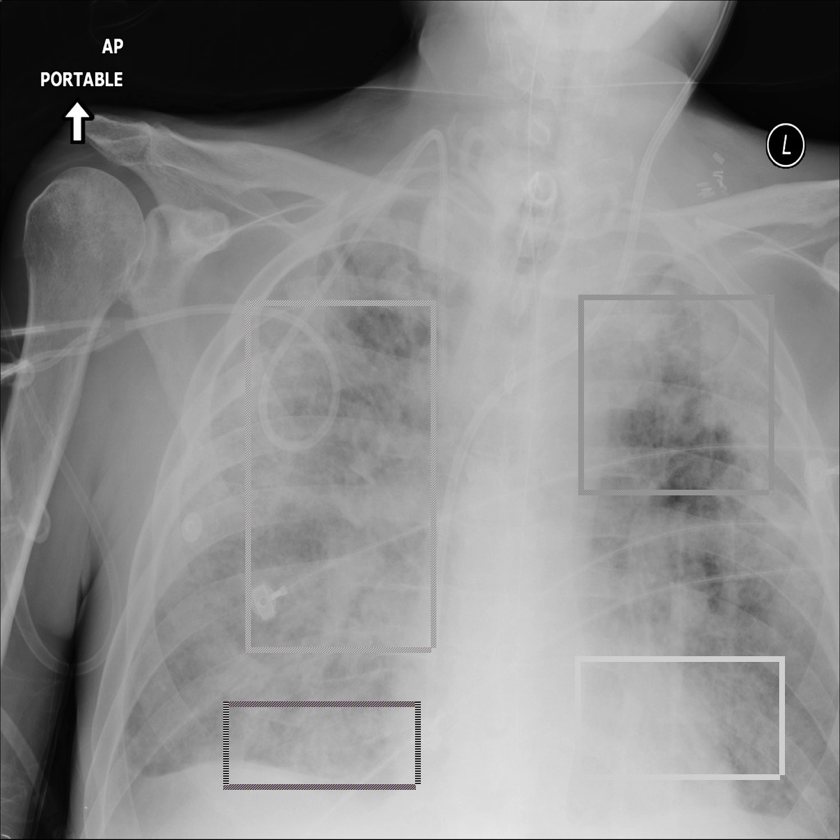

In [23]:
library(jpeg)
library(ggplot2)
library(magrittr)


# Function to parse the CSV data
parse_data <- function(df) {
  # Define a function to extract coordinates as a list [y, x, height, width]
  extract_box <- function(row) {
    c(row['y'], row['x'], row['height'], row['width'])
  }

  # Initialize the parsed dictionary
  parsed <- list()

  # Iterate through rows of the dataframe
  for (i in 1:nrow(df)) {
    row <- df[i, ]
    pid <- row[['patientId']]

    # Initialize patient entry into parsed
    if (!(pid %in% names(parsed))) {
      parsed[[pid]] <- list(
        'jpg' = sprintf('./rsna-pneumonia-detection-challenge/images/%s.jpg', pid),
        'label' = as.integer(row[['Target']]),
        'boxes' = list()
      )
    }

    # Add box if opacity is present
    if (parsed[[pid]]$label == 1) {
      parsed[[pid]]$boxes <- c(parsed[[pid]]$boxes, list(extract_box(row)))
    }
  }

  return(parsed)
}

# Example usage
# Replace 'your_dataframe' with your actual dataframe
parsed <- parse_data(image_bbox_df)

# Print the result for a specific patient
# print(parsed[['00436515-870c-4b36-a041-de91049b9ab4']])

library(grid)

# Function to draw a single patient with bounding box(es) if present
draw <- function(data) {
  # Open JPEG file
  im <- readJPEG(data[['jpg']])
    # Display the image
# plot(0:1, 0:1, type = 'n', axes = FALSE, xlab = '', ylab = '')
# rasterImage(im, 0, 0, 1, 1)
  
  # Convert from single-channel grayscale to 3-channel RGB
  im <- array(im, dim = c(dim(im), 3))

  # Add boxes with random color if present
  for (box in data[['boxes']]) {
    rgb <- floor(runif(3) * 256)
    im <- overlay_box(im = im, box = box, rgb = rgb, stroke = 6)
  }

  # Plot the image
  ggplot() +
    annotation_custom(rasterGrob(im, interpolate = TRUE),
                      xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf) +
    theme_void() +
    theme(plot.margin = margin(0, 0, 0, 0))
}

# Function to overlay a box on the image
overlay_box <- function(im, box, rgb, stroke = 1) {
  # Convert coordinates to integers
  box <- lapply(box, as.integer)
  
  # Extract coordinates
  y1 <- box[['y']]
  x1 <- box[['x']]
  height <- box[['height']]
  width <- box[['width']]
  
  y2 <- y1 + height
  x2 <- x1 + width

  # Normalize RGB values to [0, 1]
  rgb <- rgb[1:3] / 255

  im[y1:(y1 + stroke), x1:x2, ] <- rgb
  im[y2:(y2 + stroke), x1:x2, ] <- rgb
  im[y1:y2, x1:(x1 + stroke), ] <- rgb
  im[y1:y2, x2:(x2 + stroke), ] <- rgb

  return(im)
}


# Example usage
# Replace 'your_data' with the actual data you have
draw(parsed[['32408669-c137-4e8d-bd62-fe8345b40e73']])



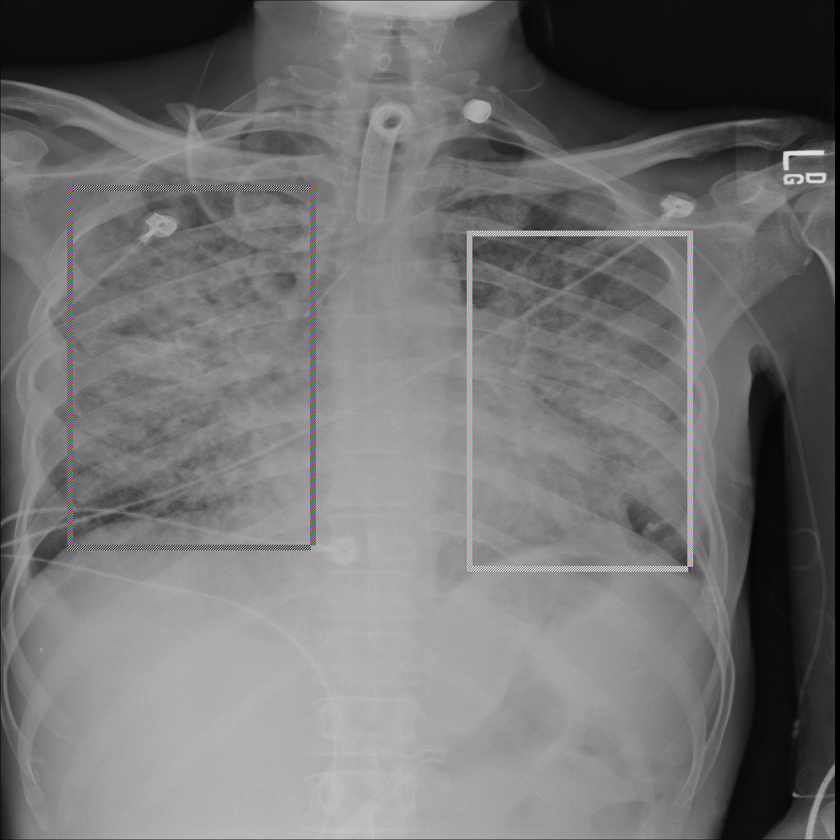

In [24]:
draw(parsed[[image_bbox_df$patientId[10]]])